# ML: Unsupervised Learning   

## Quick reminder
   
   * **Unsupervised machine** learning algorithms rely on data that has no labels, predefined features, or specified classification sets.
<img src="./pics/unsup_scheme.jpg" style="width:500px;">

   * **Supervised vs Unsupervised**
       * Comparison with **k-means** clustering
       <img src="./pics/sup_unsup_example1.jpg" style="width:550px;">
       
       * Example of how **k-means** clustering works   
       K-means takes unlabelled data points as an input and groups them into “k” clusters. It assigns each data item to the nearest cluster center.
        <img src="./pics/kmeans_example1.jpg" style="width:550px;">
        
       * Example of how **DBSCAN** clustering works  
        DBSCAN (or Density-based spatial clustering of applications with noise) separates clusters of high density from clusters of low density, seeking areas in the data with a high density of observations. 
        
        <img src="./pics/dbscan_example1.jpg" style="width:550px;">

## Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [1]:
from IPython.display import Image
%matplotlib inline

## K-means

#### How does it work?

Upon initializing the model, **number of clusters** should be predefined.

    As example, let's say we have some 2-dimensional unlabelled data; thus, we can shoose **k=2** (number of clusters).
<img src="./pics/kmeans1.png" style="width:400px;">

    1. Randomly create centroids (cluster centres) in the same vector space as the data
<img src="./pics/kmeans2.png" style="width:400px;">

    2. Each data point is allocated to the nearest centroid  
    This “nearness” is based on Euclidean Distance, which equates to measuring the distance between 2 points.
<img src="./pics/kmeans3.png" style="width:400px;">

    The result is our clusters. But this is only our first iteration.
<img src="./pics/kmeans4.png" style="width:400px;">

    3. Centroids move to the location of the average of points in their cluster
<img src="./pics/kmeans5.png" style="width:400px;">

    Then we repeat allocating each point to the nearest centroid.
<img src="./pics/kmeans6.png" style="width:400px;">

    Which gives us clusters according to our second iteration.
<img src="./pics/kmeans7.png" style="width:400px;">

    4. Repeat this process until clusters stop moving

### Example

### Generate “random” clusters with sklearn’s `make_blobs`

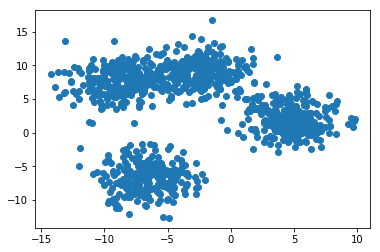

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


data = make_blobs(
    n_samples=1000, 
    n_features=2, 
    centers=4, 
    cluster_std=2.0, 
    random_state=42
)

plt.scatter(data[0][:,0], data[0][:,1])

In [10]:
data

(array([[-8.27175201,  6.80571297],
        [-5.39543645, -6.28152443],
        [-5.76297337, -6.72809881],
        ...,
        [ 2.74108106,  7.23793381],
        [-8.0986516 , -7.2540522 ],
        [-9.96266381,  6.90507917]]),
 array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3,
        3, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3,
        1, 3, 0, 1, 3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0,
        2, 2, 1, 0, 3, 0, 1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2,
        0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0,
        3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2,
        1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0, 3, 2, 2,
        0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2, 3, 2, 1, 0, 0, 1, 0, 3,
        2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0, 1, 1, 0, 3, 2, 2,
        2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0, 2, 0, 3, 1,
        3, 3, 2, 0, 3, 0, 1, 

In [17]:
# Points
data[0]

array([[-8.27175201,  6.80571297],
       [-5.39543645, -6.28152443],
       [-5.76297337, -6.72809881],
       ...,
       [ 2.74108106,  7.23793381],
       [-8.0986516 , -7.2540522 ],
       [-9.96266381,  6.90507917]])

In [19]:
# Labels / which cluster they are belong too
data[1]

array([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3,
       3, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3,
       1, 3, 0, 1, 3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0,
       2, 2, 1, 0, 3, 0, 1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2,
       0, 0, 0, 0, 1, 1, 3, 1, 3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0,
       3, 2, 1, 1, 1, 1, 2, 3, 2, 1, 0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2,
       1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0, 3, 2, 2,
       0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2, 3, 2, 1, 0, 0, 1, 0, 3,
       2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0, 1, 1, 0, 3, 2, 2,
       2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0, 2, 0, 3, 1,
       3, 3, 2, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 2, 2, 3, 2, 2, 1, 2, 3,
       2, 1, 3, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 2, 0, 2, 2, 1, 1, 1, 3, 1,
       3, 3, 2, 1, 0, 3, 1, 0, 1, 2, 0, 3, 1, 3, 2, 1, 3, 2, 3, 1, 2, 0,
       0, 2, 0, 3, 3, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2,

### Import and run k-means

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4) # k=4 is predefined by us. We can expect that from data
kmeans.fit(data[0])

y = kmeans.fit_predict(data[0])

### Visualize clusters

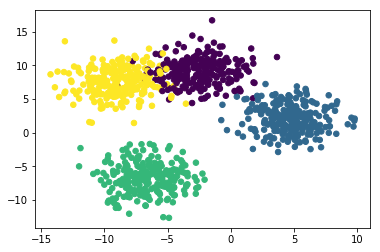

In [29]:
plt.scatter(
    
    data[0][:,0], 
    data[0][:,1], 

    s=30, 

    c=data[1]
)

## DBSCAN

[Scikit DBSCAN demo](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)  
[DBSCAN parameters](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

In [34]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


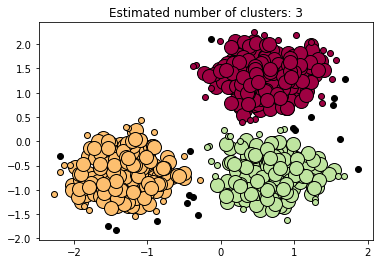

In [35]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 13
Homogeneity: 0.401
Completeness: 0.890
V-measure: 0.553
Adjusted Rand Index: 0.329
Adjusted Mutual Information: 0.400
Silhouette Coefficient: 0.421


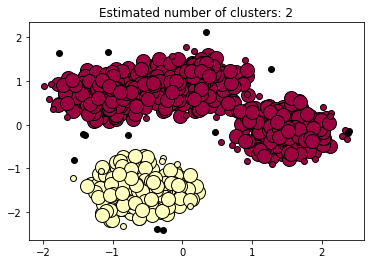

In [36]:
# Generate sample data
X, labels_true = data[0], data[1]

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Important Parameters

* **eps**: float, default=0.5  
    The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

* **min_samples**: int, default=5  
    The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.


Estimated number of clusters: 8
Estimated number of noise points: 558
Homogeneity: 0.433
Completeness: 0.400
V-measure: 0.416
Adjusted Rand Index: 0.139
Adjusted Mutual Information: 0.395
Silhouette Coefficient: -0.157


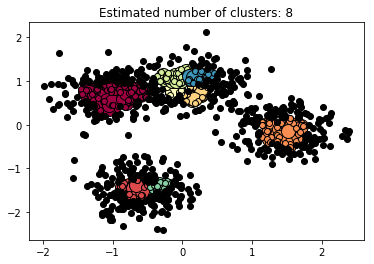

Estimated number of clusters: 3
Estimated number of noise points: 75
Homogeneity: 0.687
Completeness: 0.775
V-measure: 0.728
Adjusted Rand Index: 0.644
Adjusted Mutual Information: 0.686
Silhouette Coefficient: 0.537


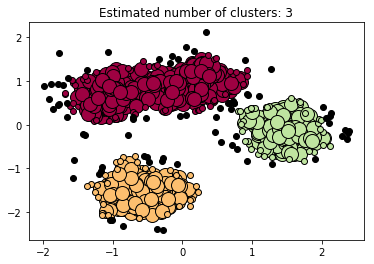

Estimated number of clusters: 2
Estimated number of noise points: 13
Homogeneity: 0.401
Completeness: 0.890
V-measure: 0.553
Adjusted Rand Index: 0.329
Adjusted Mutual Information: 0.400
Silhouette Coefficient: 0.421


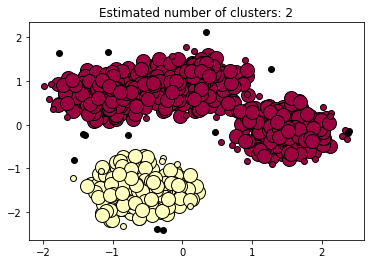

Estimated number of clusters: 1
Estimated number of noise points: 1
Homogeneity: 0.001
Completeness: 0.176
V-measure: 0.002
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000
Silhouette Coefficient: 0.225


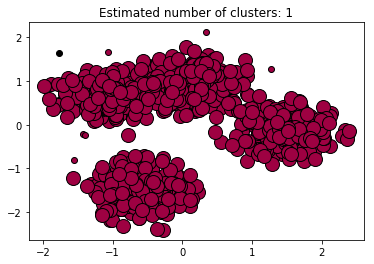

In [41]:
for eps_val in [0.1,0.2,0.3,0.5]:
    # Generate sample data
    X, labels_true = data[0], data[1]

    X = StandardScaler().fit_transform(X)

    # Compute DBSCAN
    db = DBSCAN(eps=eps_val, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f"
          % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f"
          % metrics.adjusted_mutual_info_score(labels_true, labels))
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, labels))

    # Plot result
    import matplotlib.pyplot as plt

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

Estimated number of clusters: 4
Estimated number of noise points: 247
Homogeneity: 0.704
Completeness: 0.609
V-measure: 0.653
Adjusted Rand Index: 0.567
Adjusted Mutual Information: 0.608
Silhouette Coefficient: 0.347


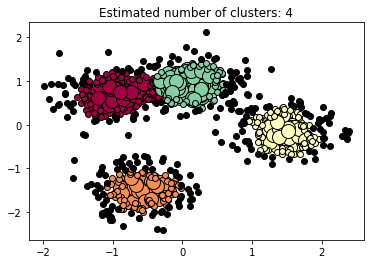

In [51]:
eps_val = 0.2
# Generate sample data
X, labels_true = data[0], data[1]

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=eps_val, min_samples=25).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### Comments
   * Black points - noise, non-clustered data
   * Colored points - clustered data  
   
   * Advantage of DBSCAN  
     -> no need to predefine **number of clusters**
  
   * [Scikit-Learn metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html)  
       * print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))  
       **homogeneity**: float  
        score between 0.0 and 1.0. 1.0 stands for perfectly homogeneous labeling
   
       * print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))  
       **completeness**: float
        score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling

       * print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))  
        **v_measure**: float  
        harmonic mean of the first two
        
       * print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))   
        Compute the mean Silhouette Coefficient of all samples.

        The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is `(b - a) / max(a, b)`. To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

        This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

        The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

References:  
    [1]()  
    [2]()  
    [3](https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175)  